<a href="https://colab.research.google.com/github/2303A51552/ADM-2025/blob/main/Lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SIMPLE LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales=pd.DataFrame(pd.read_csv("/content/SLR_Salary_dataset.csv"))
sales.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


DATA INSPECTION

In [4]:
sales.shape

(30, 3)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [6]:
sales.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


DATA CLEANING

In [7]:
sales.isnull().sum()*100/sales.shape[0]

,0
Unnamed: 0,0.0
YearsExperience,0.0
Salary,0.0


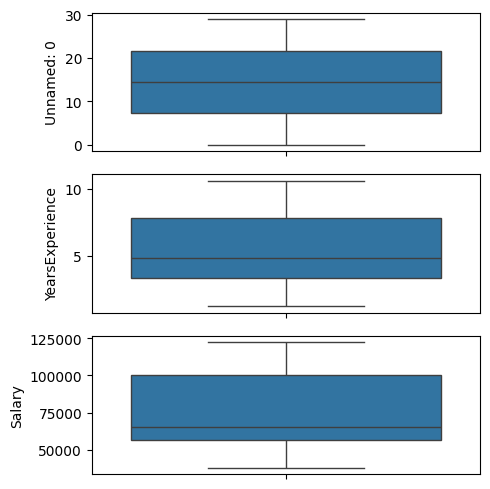

In [8]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(sales['Unnamed: 0'], ax = axs[0])
plt2 = sns.boxplot(sales['YearsExperience'], ax = axs[1])
plt3 = sns.boxplot(sales['Salary'], ax = axs[2])
plt.tight_layout()

Exploratory Data Analysis

<Axes: ylabel='YearsExperience'>

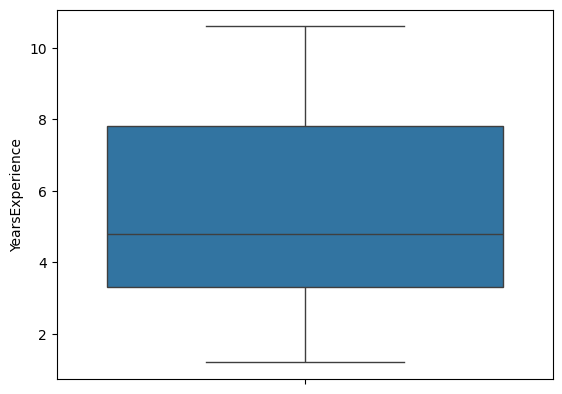

In [11]:
#Taget Variable:Years Of experience
sns.boxplot(sales['YearsExperience'])

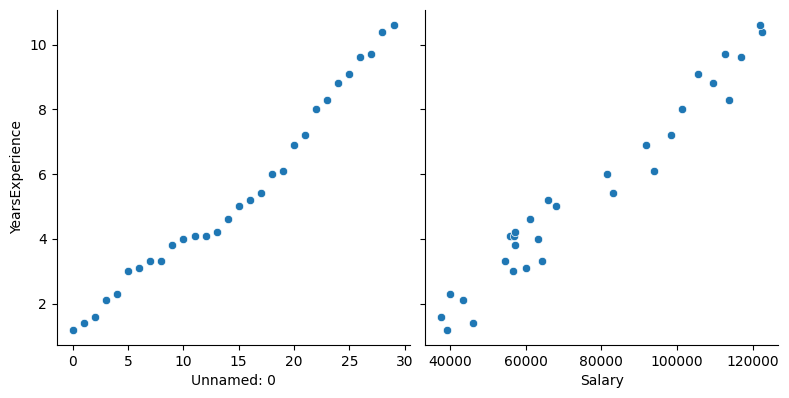

In [12]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(sales, x_vars=['Unnamed: 0', 'Salary'], y_vars='YearsExperience', height=4, aspect=1, kind='scatter')
plt.show()

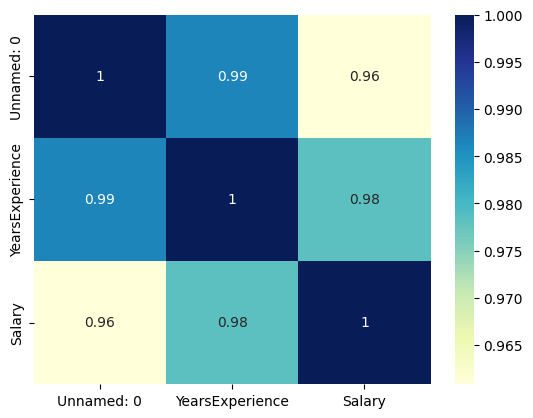

In [13]:
sns.heatmap(sales.corr(), cmap="YlGnBu", annot = True)
plt.show()

Model Building

In [15]:
X = sales['Salary']
y = sales['YearsExperience']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
X_train.head()

,Salary
17,83089.0
22,101303.0
11,55795.0
4,39892.0
29,121873.0


In [18]:
y_train.head()

,YearsExperience
17,5.4
22,8.0
11,4.1
4,2.3
29,10.6


Building a linear Model

In [19]:
import statsmodels.api as sm

In [20]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [21]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

,0
const,-2.106406
Salary,0.000098


In [22]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:        YearsExperience   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           9.91e-14
Time:                        08:06:38   Log-Likelihood:                -18.409
No. Observations:                  21   AIC:                             40.82
Df Residuals:                      19   BIC:                             42.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1064      0.402     -5.239      0.0

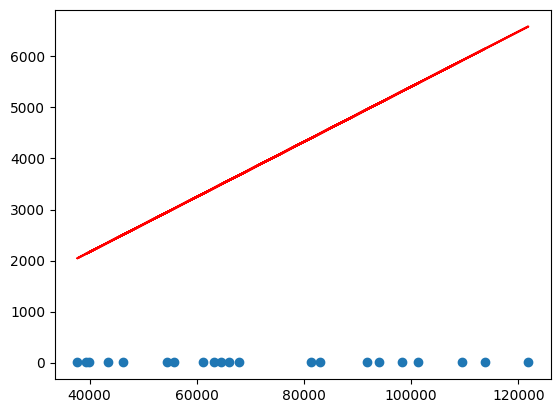

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

Model Evaluation

In [24]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

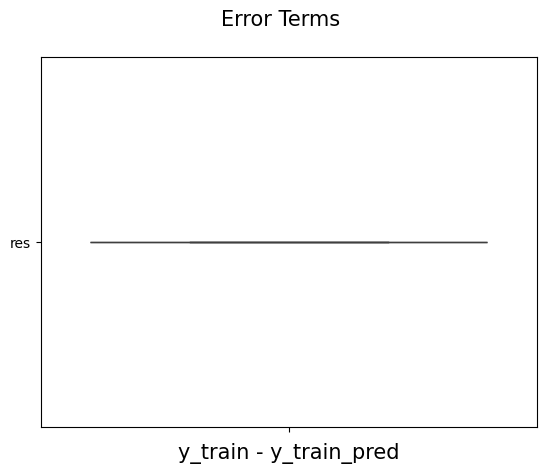

In [27]:
fig = plt.figure()
sns.boxplot('res')
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

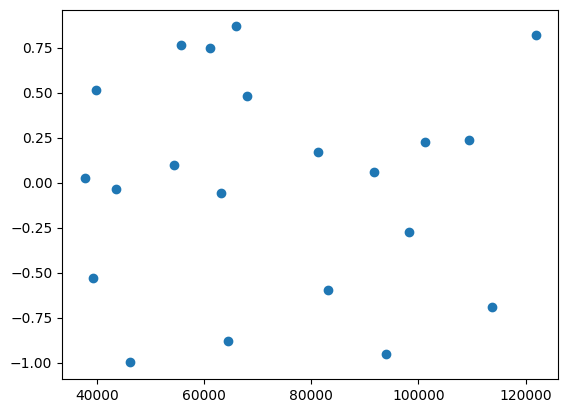

In [28]:
plt.scatter(X_train,res)
plt.show()

In [29]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [30]:
y_pred.head()

,0
9,3.470339
26,9.299641
28,9.828354
13,3.459808
5,3.416999


In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.6336865963540329

In [33]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9568319598472428

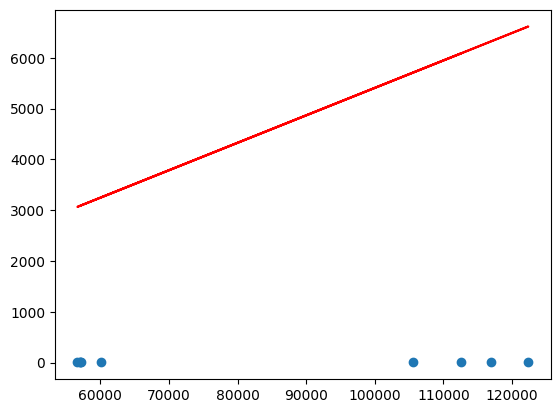

In [34]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

##LOGISTIC REGRESSION

In [9]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt